## Import Packages

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import re
import nltk
from nltk.text import Text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('train.csv')
df.head(6)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...


In [3]:
df.shape

(31962, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
df.isnull().values.any()

False

## Data Processing

In [7]:
print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   



In [8]:
#Lower Case 
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

In [9]:
#Remove @ Mentions
def remove_tag(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) 
    return tweet
df['tweet'] = df['tweet'].apply(remove_tag)

In [10]:
#Remove '#' Symbol
def remove_hashtag(tweet):
    tweet= re.sub(r'#', '', tweet)
    return tweet
df['tweet'] = df['tweet'].apply(remove_hashtag)

In [11]:
#Remove RT 
def remove_rt(tweet):
    tweet= re.sub(r'RT[\s]+', '', tweet)
    return tweet
df['tweet'] = df['tweet'].apply(remove_rt)

In [12]:
#Remove Hyperlink
def remove_link(tweet):
    tweet= re.sub(r'https\S+|www\S+http\S+', '', tweet)
    return tweet
df['tweet'] = df['tweet'].apply(remove_link)

In [13]:
#Remove Special Characters
def remove_character(text):
    return " ".join(e for e in text.split() if e.isalnum())
df['tweet'] = df['tweet'].apply(remove_character)

In [14]:
print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")

when a father is dysfunctional and is so selfish he drags his kids into his run 

thanks for lyft credit i use cause they offer wheelchair vans in disapointed getthanked 

bihday your majesty 

model i love u take with u all the time in 



## Data Visualization

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

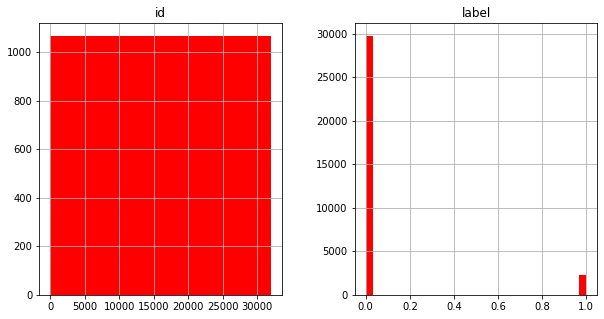

In [15]:
df.hist(bins= 30, figsize = (10,5), color = 'red')


<AxesSubplot:xlabel='label', ylabel='count'>

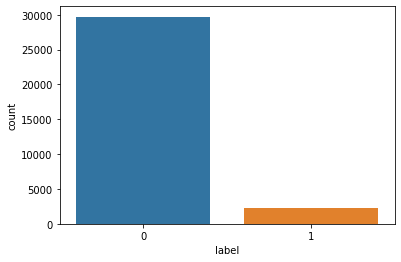

In [16]:
sns.countplot(x=df['label'] ,data=df)


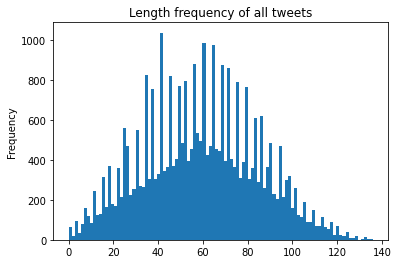

In [17]:
df['tweet'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of all tweets')
plt.show()

In [18]:
df.corr

<bound method DataFrame.corr of           id  label                                              tweet
0          1      0  when a father is dysfunctional and is so selfi...
1          2      0  thanks for lyft credit i use cause they offer ...
2          3      0                                bihday your majesty
3          4      0         model i love u take with u all the time in
4          5      0                             society now motivation
...      ...    ...                                                ...
31957  31958      0                                       ate isz that
31958  31959      0  to see nina turner on the airwaves trying to w...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1      sikh temple vandalised in in wso condemns act
31961  31962      0                           thank you for you follow

[31962 rows x 3 columns]>

Text(0.5, 1.0, 'Correlation Matrix')

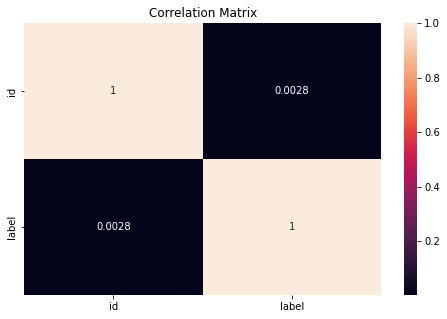

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

In [20]:
frequent_words = df[df.label == 1 ]
frequent_words.head(5)

,id,label,tweet
13,14,1,cnn calls michigan middle school the chant tcot
14,15,1,no in australia opkillingbay seashepherd helpc...
17,18,1,retweet if you
23,24,1,lumpy says i am a prove it
34,35,1,unbelievable that in the 21st century need som...


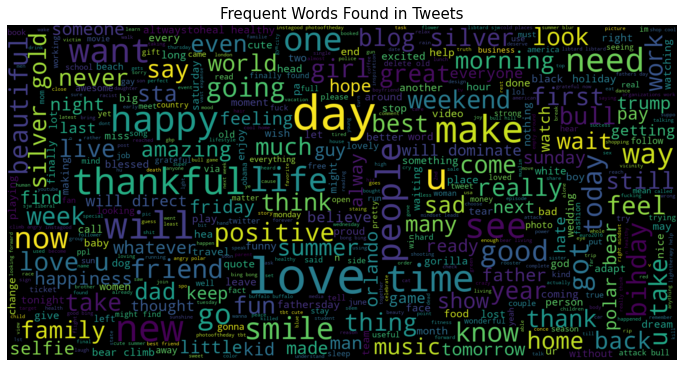

In [21]:
plt.figure(figsize=(12,12))
frequent_words = ''.join([twts for twts in df['tweet']])
wordCloud = WordCloud(max_words = 500, width = 1600, height = 800, random_state = 21, max_font_size = 119).generate(frequent_words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.title('Frequent Words Found in Tweets', fontsize = 15)
plt.show()

In [22]:
hatespeech = df[df.label == 1]
hatespeech.head(5)

,id,label,tweet
13,14,1,cnn calls michigan middle school the chant tcot
14,15,1,no in australia opkillingbay seashepherd helpc...
17,18,1,retweet if you
23,24,1,lumpy says i am a prove it
34,35,1,unbelievable that in the 21st century need som...


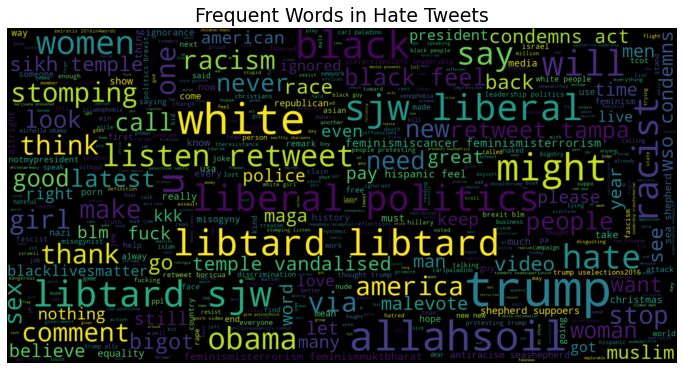

In [23]:
plt.figure(figsize=(12,12))
hatespeech = ' '.join([twts for twts in hatespeech['tweet']])
wordcloud = WordCloud(max_words=500, width=1600, height=800, random_state = 21, max_font_size = 119).generate(hatespeech)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Words in Hate Tweets', fontsize = 19)
plt.show()

## Train, Test, Split

In [24]:
x = df['tweet']
y = df['label']

In [25]:
x_train , x_test , y_train ,  y_test = train_test_split(x, y,
                                                 test_size = 0.2, 
                                                 random_state = 33)

In [26]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(df['tweet'] )
tfidf

<31962x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 356735 stored elements in Compressed Sparse Row format>

In [27]:
x_train = tfidf_vectorizer.transform(x_train)
x_test = tfidf_vectorizer.transform(x_test)

## SVM

In [28]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)
prob = svm.fit(x_train, y_train).predict_proba(x_test)
y_pred = svm.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred) * 100, '%')

Accuracy score for SVC is:  95.10402002189895 %


## Boosting Method

In [33]:
from xgboost import XGBClassifier
model_b = XGBClassifier(random_state=22,learning_rate=0.9)
model_b.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
predict_xgb = model_b.predict(x_test)


In [35]:
print(confusion_matrix(y_test,predict_xgb))
print(classification_report(y_test,predict_xgb))

[[5842   91]
 [ 266  194]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5933
           1       0.68      0.42      0.52       460

    accuracy                           0.94      6393
   macro avg       0.82      0.70      0.75      6393
weighted avg       0.94      0.94      0.94      6393



## Linear Model

In [36]:
log = LogisticRegression(random_state=42)
log.fit(x_train,y_train)



LogisticRegression(random_state=42)

In [40]:
log_pred = log.fit(x_test, y_test)


In [45]:
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(x_train,y_train)

log_pred = classifier.predict(x_test)
classifier.score(x_train,y_train)

0.9525206304509367

## Ensemble Method

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)
accuracy_score(y_test, rfc_pred)

0.9574534647270452